In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# plot MFs for clustering and lensing maps
from matplotlib import rcParams
rcParams['xtick.direction'] = 'in'
rcParams['xtick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.direction'] = 'in'
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.visible'] = True
rcParams['ytick.major.size'] = 10
rcParams['font.family'] = 'serif'
#rcParams['font.serif'] = ['Times New Roman']
rcParams['font.size'] = 12

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os

output_path = os.path.join(os.getcwd(), '2_Maps_Output')
parent_path = os.path.join(output_path, 'Simplified')
cov_path = os.path.join(output_path, 'cov_fix')

### 1. Threshold

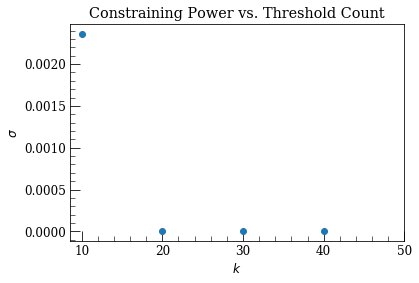

In [6]:
'''t = np.linspace(10,50,5,dtype=int) 
t_output = np.loadtxt(os.path.join(output_path, 'threshold_vs_constraints.out'))

plt.plot(t,t_output,'o')
plt.xlabel('Threshold')
plt.ylabel('Constraining Power')
'''


t_array = np.linspace(10,50,5,dtype=int)
nside = 256
smoothing = 20
cp1 = np.zeros(len(t_array))
    
#for i in smoothing_array:
for i,thr_ct in enumerate(t_array):
    sub_path = os.path.join(parent_path, f't{thr_ct}_n{nside}_s{smoothing}')
    output = np.loadtxt(os.path.join(sub_path, 'c.out'))
    cp1[i] = output[3]
    
plt.plot(t_array,cp1,'o')
plt.xlabel('$k$')
plt.xticks(t_array)
plt.ylabel('$\sigma$')
plt.title('Constraining Power vs. Threshold Count');

### 2. Smoothing

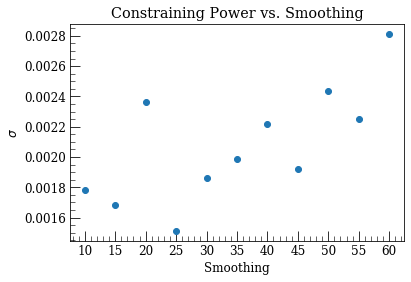

In [16]:
smoothing_array = np.linspace(10,60,11,dtype=int)
thr_ct = 10
nside = 256
cp2 = np.zeros(len(smoothing_array))
    
#for i in smoothing_array:
for i,smoothing in enumerate(smoothing_array):
    sub_path = os.path.join(parent_path, f't{thr_ct}_n{nside}_s{smoothing}')
    output = np.loadtxt(os.path.join(sub_path, 'c.out'))
    cp2[i] = output[3]
    
plt.plot(smoothing_array,cp2,'o')
plt.xlabel('Smoothing')
plt.xticks(smoothing_array)
plt.ylabel('$\sigma$')
plt.title('Constraining Power vs. Smoothing');

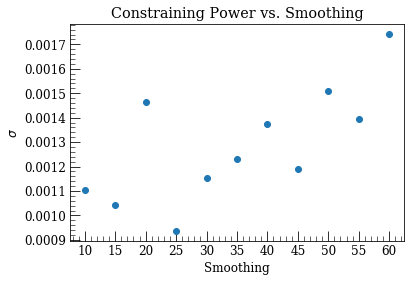

In [17]:
#for i in smoothing_array:
for i,smoothing in enumerate(smoothing_array):
    sub_path = os.path.join(cov_path, f't{thr_ct}_n{nside}_s{smoothing}')
    output = np.loadtxt(os.path.join(sub_path, 'c.out'))
    cp2[i] = output[3]
    
plt.plot(smoothing_array,cp2,'o')
plt.xlabel('Smoothing')
plt.xticks(smoothing_array)
plt.ylabel('$\sigma$')
plt.title('Constraining Power vs. Smoothing');

### 3. nside

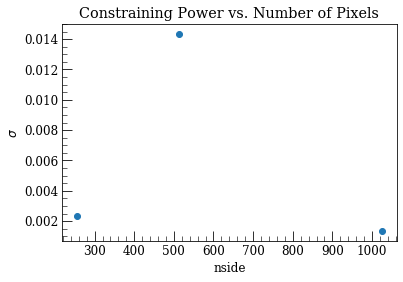

In [19]:
nside_array = [256,512,1024]
thr_ct = 10
smoothing = 20
cp3 = np.zeros(len(nside_array))

for i,nside in enumerate(nside_array):
    sub_path = os.path.join(parent_path, f't{thr_ct}_n{nside}_s{smoothing}')
    output = np.loadtxt(os.path.join(sub_path, 'c.out'))
    cp3[i] = output[3]
    
plt.plot(nside_array,cp3,'o')
plt.xlabel('nside') # change axis to power scale (2^n)
plt.ylabel('$\sigma$')
plt.title('Constraining Power vs. Number of Pixels');

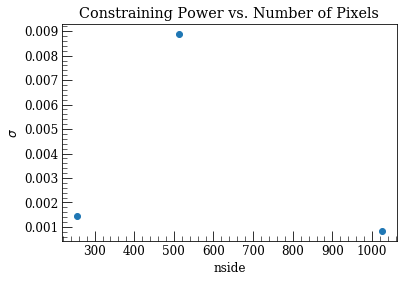

In [20]:
for i,nside in enumerate(nside_array):
    sub_path = os.path.join(cov_path, f't{thr_ct}_n{nside}_s{smoothing}')
    output = np.loadtxt(os.path.join(sub_path, 'c.out'))
    cp3[i] = output[3]
    
plt.plot(nside_array,cp3,'o')
plt.xlabel('nside') # change axis to power scale (2^n)
plt.ylabel('$\sigma$')
plt.title('Constraining Power vs. Number of Pixels');

### 4. % of Sky

In [ ]:
f_array = [100,400]
nside_array = 256
thr_ct = 10
smoothing = 20
cp4 = np.zeros(len(f_array))

for i,nside in enumerate(f_array):
    sub_path = os.path.join(cov_path, f't{thr_ct}_n{nside}_s{smoothing}_f{f}')
    output = np.loadtxt(os.path.join(sub_path, 'c.out'))
    cp4[i] = output[3]
    
plt.plot(f_array,cp4,'o')
plt.xlabel('fraction')
plt.ylabel('$\sigma$')
plt.title('Constraining Power vs. Fraction of Sky');